In [1]:
import pandas as pd
import seaborn as sns

congruent RT mode: tensor(73.)
incongruent RT mode: tensor(93.)


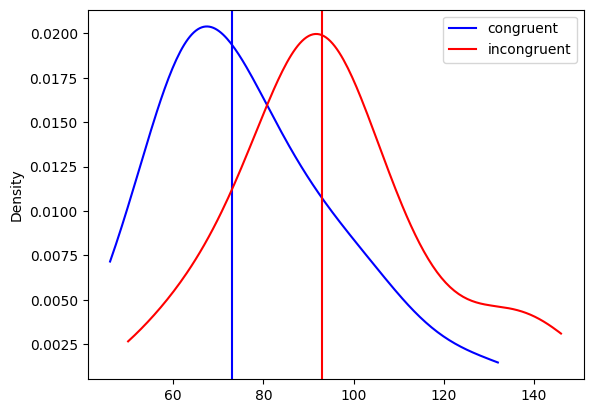

In [67]:
%reload_ext autoreload
%autoreload 3

from src.cogponder.datasets import StroopSRODataset, CogPonderDataModule
import matplotlib.pyplot as plt
import seaborn as sns

datamodule = CogPonderDataModule(StroopSRODataset(1))

dataset = StroopSRODataset(n_subjects=1, response_step_interval=10)
X, conditions, is_corrects, responses, response_steps = dataset[0]

congruent_mask = conditions.bool()
rs = response_steps[congruent_mask].float()
print('congruent RT mode:', rs.median())
sns.kdeplot(rs, label='congruent', color='blue', cut=0)
plt.axvline(rs.median().numpy(), color='blue')

rs = response_steps[~congruent_mask].float()
print('incongruent RT mode:', rs.median())
sns.kdeplot(rs, label='incongruent', color='red', cut=0)
plt.axvline(rs.median().numpy(), color='red')

plt.legend()
plt.show()


In [ ]:
data = pd.read_csv('data/Self_Regulation_Ontology/stroop.csv.gz', index_col=0)

In [22]:
data = pd.read_csv('data/Self_Regulation_Ontology/adaptive_n_back.csv.gz', index_col=0)
data = data.query('worker_id == worker_id.unique()[-1] and exp_stage == "adaptive"')

data_s521_2back = data.query('load == 2').sort_values(['block_num', 'trial_num'])
data_s521_2back

,battery_name,block_num,correct,correct_response,exp_stage,experiment_exp_id,finishtime,focus_shifts,full_screen,key_press,...,possible_responses,rt,stim,stimulus,target,time_elapsed,trial_id,trial_num,trial_type,worker_id
adaptive_n_back_s521_0067,Self Regulation Battery,0.0,1.0,40,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,40.0,...,"[37, 40]",392.0,g,"<div class = ""centerbox""><div class = ""center-...",NaN,265160,stim,40.0,poldrack-single-stim,s560
adaptive_n_back_s521_0069,Self Regulation Battery,0.0,1.0,40,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,40.0,...,"[37, 40]",549.0,D,"<div class = ""centerbox""><div class = ""center-...",NaN,267178,stim,41.0,poldrack-single-stim,s560
adaptive_n_back_s521_0071,Self Regulation Battery,0.0,1.0,37,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,37.0,...,"[37, 40]",854.0,g,"<div class = ""centerbox""><div class = ""center-...",g,269188,stim,42.0,poldrack-single-stim,s560
adaptive_n_back_s521_0073,Self Regulation Battery,0.0,1.0,40,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,40.0,...,"[37, 40]",834.0,b,"<div class = ""centerbox""><div class = ""center-...",D,271199,stim,43.0,poldrack-single-stim,s560
adaptive_n_back_s521_0075,Self Regulation Battery,0.0,1.0,40,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,40.0,...,"[37, 40]",956.0,b,"<div class = ""centerbox""><div class = ""center-...",g,273211,stim,44.0,poldrack-single-stim,s560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
adaptive_n_back_s521_0855,Self Regulation Battery,16.0,1.0,37,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,37.0,...,"[37, 40]",1081.0,d,"<div class = ""centerbox""><div class = ""center-...",d,1142508,stim,418.0,poldrack-single-stim,s560
adaptive_n_back_s521_0857,Self Regulation Battery,16.0,1.0,40,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,40.0,...,"[37, 40]",655.0,d,"<div class = ""centerbox""><div class = ""center-...",G,1144533,stim,419.0,poldrack-single-stim,s560
adaptive_n_back_s521_0859,Self Regulation Battery,16.0,1.0,40,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,40.0,...,"[37, 40]",1034.0,g,"<div class = ""centerbox""><div class = ""center-...",d,1146581,stim,420.0,poldrack-single-stim,s560
adaptive_n_back_s521_0861,Self Regulation Battery,16.0,1.0,37,adaptive,adaptive_n_back,2016-09-17 04:35:10,0,True,37.0,...,"[37, 40]",1217.0,d,"<div class = ""centerbox""><div class = ""center-...",d,1148624,stim,421.0,poldrack-single-stim,s560


In [ ]:
stimuli = data_s521_2back.stim.str.upper()
rt = data_s521_2back.rt.values
responses = data_s521_2back.key_press
is_corrects = data_s521_2back.correct
targets = data_s521_2back.target
# sns.kdeplot(rt)
is_corrects